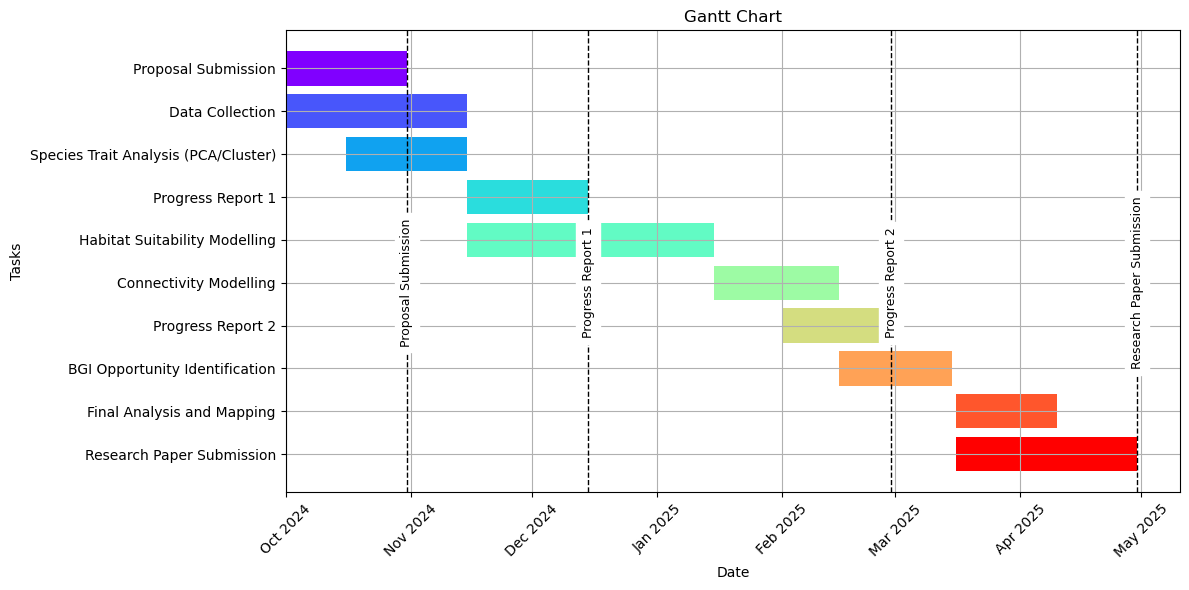

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
import numpy as np

# Data for the Gantt chart
tasks = [
    {"Task": "Proposal Submission", "Start": "2024-10-01", "End": "2024-10-31"},
    {"Task": "Data Collection", "Start": "2024-10-01", "End": "2024-11-15"},
    {"Task": "Species Trait Analysis (PCA/Cluster)", "Start": "2024-10-16", "End": "2024-11-15"},
    {"Task": "Progress Report 1", "Start": "2024-11-15", "End": "2024-12-15"},
    {"Task": "Habitat Suitability Modelling", "Start": "2024-11-15", "End": "2025-01-15"},
    {"Task": "Connectivity Modelling", "Start": "2025-01-15", "End": "2025-02-15"},
    {"Task": "Progress Report 2", "Start": "2025-02-01", "End": "2025-02-28"},
    {"Task": "BGI Opportunity Identification", "Start": "2025-02-15", "End": "2025-03-15"},
    {"Task": "Final Analysis and Mapping", "Start": "2025-03-16", "End": "2025-04-10"},
    {"Task": "Research Paper Submission", "Start": "2025-03-16", "End": "2025-04-30"}
]

# Deadlines
deadlines = [
    {"Date": "2024-10-31", "Label": "Proposal Submission"},
    {"Date": "2024-12-15", "Label": "Progress Report 1"},
    {"Date": "2025-02-28", "Label": "Progress Report 2"},
    {"Date": "2025-04-30", "Label": "Research Paper Submission"}
]

# Convert to DataFrame
df = pd.DataFrame(tasks)
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])
df['Duration'] = (df['End'] - df['Start']).dt.days

# Convert deadlines to datetime
deadline_df = pd.DataFrame(deadlines)
deadline_df['Date'] = pd.to_datetime(deadline_df['Date'])

# Create the Gantt chart
fig, ax = plt.subplots(figsize=(12, 6))

# Define colors for the bars (rainbow order)
colors = plt.cm.rainbow(np.linspace(0, 1, len(df)))

# Plot each task
for i, (task, start, duration) in enumerate(zip(df['Task'], df['Start'], df['Duration'])):
    ax.barh(task, duration, left=start, color=colors[i], edgecolor='none')

# Add vertical lines for deadlines with vertical labels in the middle of the chart
for _, row in deadline_df.iterrows():
    deadline_date = row['Date']
    label = row['Label']
    ax.axvline(deadline_date, color='black', linestyle='--', linewidth=1)
    # Add vertical text label for each deadline in the middle of the chart
    y_position = len(df) / 2  # Position in the middle of the chart
    ax.text(deadline_date, y_position, label, color='black', va='center', ha='center', rotation=90, fontsize=9, backgroundcolor='white')

# Set x-axis to show months
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Invert y-axis
ax.invert_yaxis()

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Tasks')
plt.title('Gantt Chart')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.grid(True)
plt.show()
